#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

Feb 27, 2016

## Day 1 of ~EXPLORATION~

Goals:
* Load data
* Ask some questions
* Make some visualizations

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Change in project direction

We realized that the neuroimaging dataset was not the most compatible for our goal of exploring mental health with the population at large. As such, we took some time to explore other datasets in this realm: survey on mental health facilities in the US, survey on drug abuse, and others. We pivoted to drug abuse and health dataset, because it has a wide range of features that will enable us to explore most of the various axes of diversity (age, ability, health, gender, era, etc.) that we were interested in pursuing in this project.

Without further ado, let's load the data!

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [4]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [3]:
# pp.pprint(df.columns.values.tolist())

### Round 1

Let's practice doing some data visualizations just on the smoking features.

Some questions/curiosities:
* Trend between age first smoked and agae at the time of survey
* Trends of drug abuse impacting personal lives
* Difference trends for people from different background (age, gender, sexuality, etc)

#### CIGTRY vs. CIGYFU

Is there a trend between age first smoked and year of first cig use?

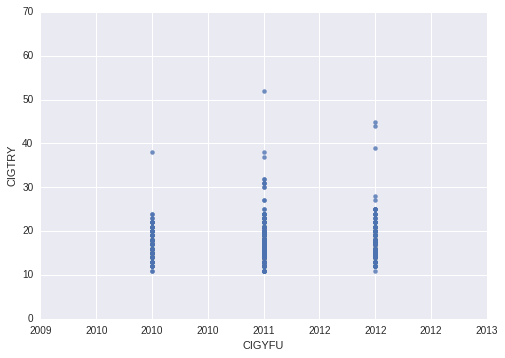

In [4]:
# CIGTRY: age of first smoked cig
# CIGYFU: year of first cig use

sns.regplot(x=df.CIGYFU, y=df.CIGTRY, fit_reg=False)
axes = plt.gca()
axes.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes.set_xlim([2009, 2013])
axes.set_ylim([0,70])
plt.show()

It turns out that this isn't very interesting... this data only contains samples where the individuals' year of first cig use is sometime between 2010 and 2012. 

#### CIGTRY vs. CIG30USE

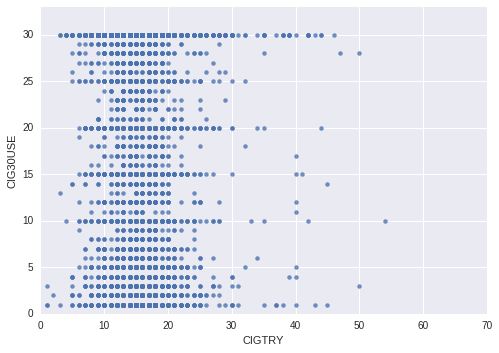

In [5]:
# CIGTRY: age of first smoked cig
# CIG30USE: how many smoked in the last month 

sns.regplot(x="CIGTRY", y="CIG30USE", data=df, fit_reg=False)
axes = plt.gca()
axes.set_xlim([0, 70])
axes.set_ylim([0, 33])
plt.show()

^ This is the whole picture... however...

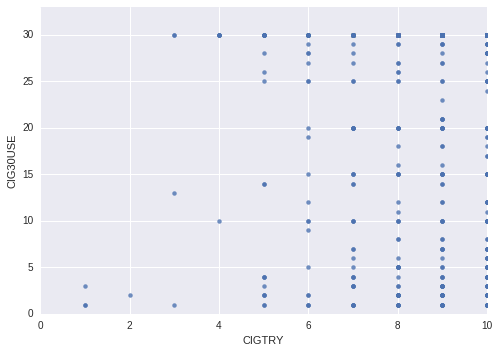

In [6]:
sns.regplot(x="CIGTRY", y="CIG30USE", data=df, fit_reg=False)
axes = plt.gca()
axes.set_xlim([0, 10])
axes.set_ylim([0, 33])
plt.show()

^ We're seeing some points for children under 10 years old trying cigarettes. While *maybe* the young children tried cigarettes, we find it unlikely that 3 and 4 year olds have smoked 30/30 days in the past month... We suspect that the survey was falsely answered OR that was secondhand smoking. :(

Scatterplots are good for quick visualizations and seeing how things may relate to each other.

BRENNA TOOK THIS SURVEY AS A HIGH SCHOOL STUDENT??

#### Counts of drug usage

Let's visualize the counts of each drug being used. We have a suspicion that some individuals use more than one drug regularly, and will follow up on that thought afterwards.

In [7]:
def drug_ever(df, drugstr):
    """
    returns (# of participants who have used the drug) 
    divided by (# of respondents to corresponding question) 
    for the given dataframe and drugstr
    """
    counts = df[drugstr].value_counts()
    return counts[1]/float(counts.sum())

In [8]:
majordrug_names = ['Tobacco', 'Alcohol', 'Marijuana', 'Cocaine', 'Heroin']
hallucinogen_names = ['LSD', 'PCP', 'Peyote', 'Mescaline', 'Psilocybin', 'Ecstasy', 'OtherHallucinogens']
inhalant_names = ['AmylNitrate', 'CorrectionFluid', 'Gasoline', 'Glue', 'Halothane', 
                  'LacquerThinner', 'LighterGas', 'NitrousOxide', 'SprayPaint', 'OtherAerosol', 'OtherInhalants']
painreliever_names = ['Darvocet', 'Percocet', 'Vicodin', 'BelowRedCard', 
                      'Codeine', 'Demerol', 'Dilaudid', 'Fioricet', 
                      'Fiorinal', 'Hydrocodone', 'Methadone', 'Morphine', 
                      'Oxycontin', 'Phencod', 'Propoxyphene', 'SK65',
                      'Stadol', 'Talacen', 'Talwin', 'Talwinnx', 
                      'Tramadol', 'Ultram', 'OtherPainRelievers']

# TODO: Tranquilizers, Stimulants, Sedatives

majordrug_features = ['CIGEVER', 'ALCEVER', 'MJEVER', 'COCEVER', 'HEREVER']
hallucinogen_features = ['LSD', 'PCP', 'PEYOTE', 'MESC', 'PSILCY', 'ECSTASY', 'HALNOLST'] 
inhalant_features = ['AMYLNIT', 'CLEFLU', 'GAS', 'GLUE', 'ETHER', 
                     'SOLVENT', 'LGAS', 'NITOXID', 'SPPAINT', 'AEROS', 'INHNOLST']
painreliever_features = ['DARVTYLC', 'PERCTYLX', 'VICOLOR', 'ANLCARD', 
                        'CODEINE', 'DEMEROL', 'DILAUD', 'FIORICET',
                        'FIORINAL', 'HYDROCOD', 'METHDON', 'MORPHINE', 
                        'OXYCONTN', 'PHENCOD', 'PROPOXY', 'SK65A', 
                        'STADOL', 'TALACEN', 'TALWIN', 'TALWINNX',
                        'TRAMADOL', 'ULTRAM', 'ANLNOLST']


drugnames = majordrug_names + hallucinogen_names + inhalant_names + painreliever_names
featurenames = majordrug_features + hallucinogen_features + inhalant_features + painreliever_features
                
drug_ever_proportions = [drug_ever(df, x) for x in featurenames]
drug_ever_df = pd.DataFrame({
                              'Name': pd.Series(drugnames, index=range(len(drugnames))), 
                              'DrugEver': pd.Series(drug_ever_proportions, index=range(len(drugnames)))
                            }) 

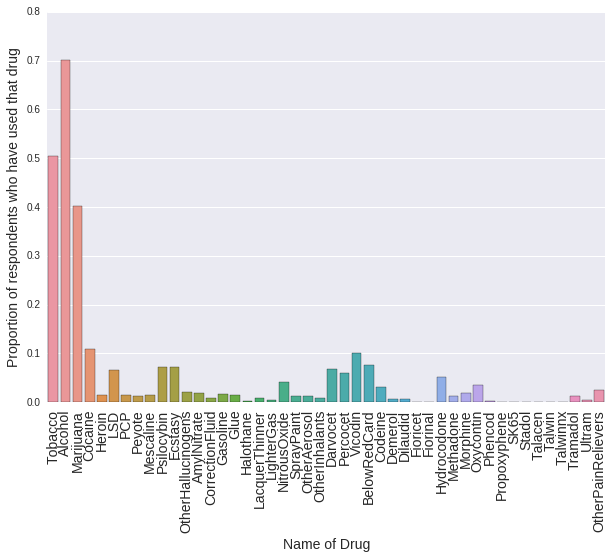

In [9]:
plt.figure(figsize=(10, 7))
sns.barplot(x=drug_ever_df.Name, y=drug_ever_df.DrugEver)
plt.xlabel('Name of Drug', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Proportion of respondents who have used that drug', fontsize=14)
plt.show()

### Investigating the trends with drug abuse and mental health

#### Do individuals still engage in drug abuse even after family/friends intervene?
#### Adult Depression features in dataset
#### Adolescent Depression features in dataset
#### Youth Mental Health features in dataset

Day 2 of Exploration


[203, 430, 1219, 2516, 8001]


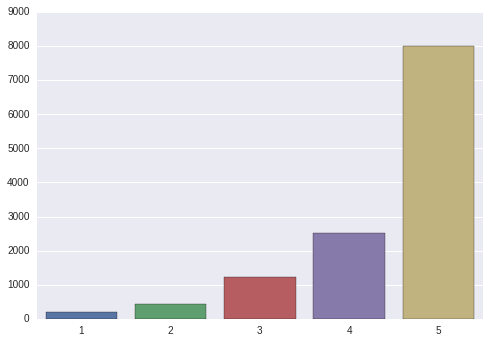

In [43]:
df2 = df.groupby(['ALCDAYS', 'DSTNGD30'])
dff = df2['ALCDAYS'].count()

# print (dff[0:8])
# print dff[1, 1]

onecounts = 0
twocounts = 0
threecounts = 0
fourcounts = 0
fivecounts = 0

for a in range(1, 6):
    onecounts += dff[a, 1]
    twocounts += dff[a, 2]
    threecounts += dff[a, 3]
    fourcounts += dff[a, 4]
    fivecounts += dff [a, 5]

agg =  [onecounts, twocounts, threecounts, fourcounts, fivecounts]    
print agg 
sns.barplot(x=[1, 2, 3, 4, 5], y=agg)

1          (2, 5]
3         (5, 10]
4        (10, 30]
6          [1, 2]
8          [1, 2]
9         (5, 10]
10        (5, 10]
11         [1, 2]
13         (2, 5]
14         [1, 2]
17         [1, 2]
25         [1, 2]
26         [1, 2]
32         (2, 5]
35        (5, 10]
37         [1, 2]
38         (2, 5]
40        (5, 10]
41        (5, 10]
42         (2, 5]
44        (5, 10]
50        (5, 10]
52        (5, 10]
53       (10, 30]
56        (5, 10]
63         [1, 2]
64       (10, 30]
66       (10, 30]
67        (5, 10]
69        (5, 10]
           ...   
55194      [1, 2]
55196    (10, 30]
55198      [1, 2]
55200     (5, 10]
55204      (2, 5]
55210      (2, 5]
55211      (2, 5]
55214      [1, 2]
55216      [1, 2]
55219     (5, 10]
55221     (5, 10]
55222      (2, 5]
55224      (2, 5]
55226      [1, 2]
55228     (5, 10]
55229      [1, 2]
55231     (5, 10]
55237      [1, 2]
55238    (10, 30]
55242      (2, 5]
55244      (2, 5]
55245    (10, 30]
55248      [1, 2]
55251      (2, 5]
55252     

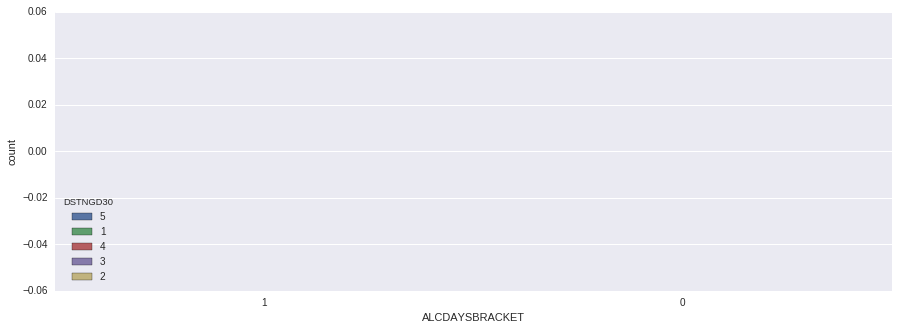

In [54]:
df_alcdays= df[df.ALCDAYS < 31]
df_alcdays= df_alcdays[df_alcdays.DSTNGD30 <6]
df_alcdays['ALCDAYSBRACKET']=pd.qcut(df_alcdays.ALCDAYS, 4)
print df_alcdays.ALCDAYSBRACKET


fig, (axis1) = plt.subplots(figsize=(15,5))
sns.countplot(x='ALCDAYSBRACKET', hue="DSTNGD30", data=df_alcdays, order=[1,0], ax=axis1)

In [ ]:
sns.regplot(x="CIGTRY", y="CIG30USE", data=df, fit_reg=False)
axes = plt.gca()
axes.set_xlim([0, 10])
axes.set_ylim([0, 33])
plt.show()